### Pymaceuticals Skill Drill - Day 1

Congratulations, you are hired by Pymaceuticals Inc., one of the leading imaginary pharmaceutical companies that specializes in anti-cancer pharmaceuticals, to assist their senior scientist team in the effort to begin screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the senior scientist team to generate an initial drug regimens comparison and generate a summary of your findings. 

For this skill drill, you will walk through the steps of a basic analysis and visualize our dataset using a new type of visualization - a box and whisker plot. Although we have provided all of the steps required to produce each output, there may be some new concepts and/or terminology in this skill drill you may not have seen before. If you are ever stuck or confused, try googling some of the terms or check out the resource links we provide throughout the activity. You got this!

### Data Cleaning 

In [1]:
%matplotlib inline

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Read the mouse data and the study results
mouse = pd.read_csv('../Resources/Mouse_metadata.csv')
study = pd.read_csv('../Resources/Study_results.csv')

In [4]:
# Display the mouse data
mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
# Display the study data
study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset and display it
study_data_complete = pd.merge(study, mouse, how="left", on="Mouse ID")
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID and display it
clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


### Generating the Boxplot

In [10]:
# Determine the final timepoint for each mouse.

# Start by getting the greatest timepoint for each mouse
max_tumor = clean_study_data_complete.groupby(['Mouse ID'])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
max_tumor

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [11]:
# Join the newly created `.max()` dataframe to the dataframe from Part 1
merged_data = max_tumor.merge(clean_study_data_complete, on=['Mouse ID', 'Timepoint'], how='left')
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [12]:
# Create a list with all 10 drug regimens.
treatment_list = ['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin']

# Create a empty list to fill with the tumor vol data
tumor_vol_list = []
tumor_vol_list_max = []
# Isolate (filter) each mice on each drug to collect their tumor volume.
for drug in treatment_list:

    # Locate the rows which match the drug and get the final tumor volumes of all mice
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    biggest_tumor = final_tumor_vol.max()  
        # Append the outcome to the empty list previously created.
    tumor_vol_list.append(final_tumor_vol)
    tumor_vol_list_max.append(biggest_tumor)
tumor_vol_list
tumor_vol_list_max

[72.2267309,
 73.21293851,
 68.92318457,
 75.12368955,
 73.32443228,
 45.22086888,
 78.56701362,
 72.45542116,
 76.66881742,
 47.68596303]

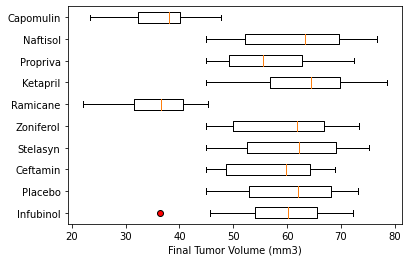

In [13]:
# Create a boxplot that visualizes the final tumor volume of all mice in the study across all drug regimens.

# Define a custom shape for all outliers in the visualization
red_circle = dict(markerfacecolor='r', marker='o')

# Create horizontal box and whisker plot
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=red_circle, vert=False)
plt.xlabel('Final Tumor Volume (mm3)')
plt.show()

In [14]:
# Assign drugs into a list
treatment_list = ['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin']

# create a empty list to fill with the tumor vol data
tumor_vol_list = []
crazy_l = []
pcm = []
##Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
        
    # Append to tumor_vol_list
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    q_one = quartiles[0.25]
    q_three = quartiles[0.75]
    iqr = q_three - q_one
    lower_bound = q_one - (1.5*iqr)
    upper_bound = q_three + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Placebo's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Stelasyn's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Zoniferol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ketapril's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Propriva's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Naftisol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<AxesSubplot:>

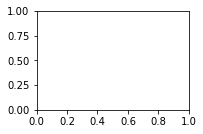

In [15]:
#Create a figure with 2x2 dubplot layout and make the top left subplot active
plt.subplot(2,2,1)

Text(0.5, 0, 'Final Tumor Volume (mm3)')

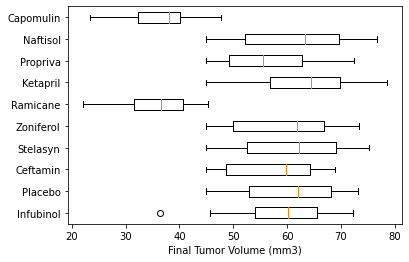

In [16]:
plt.boxplot(tumor_vol_list, labels = treatment_list, vert=False, )
plt.xlabel('Final Tumor Volume (mm3)')

<AxesSubplot:>

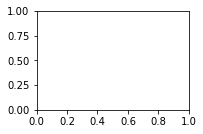

In [17]:
plt.subplot(2,2,2)

Text(0.5, 0, 'Final Tumor Volume (mm3)')

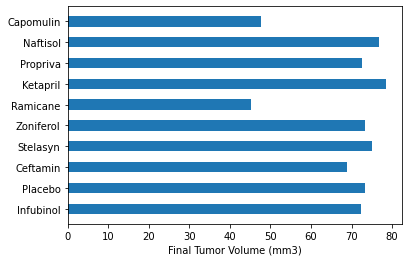

In [18]:
plt.barh(treatment_list,tumor_vol_list_max, height = 0.5)
plt.xlabel('Final Tumor Volume (mm3)')

<AxesSubplot:>

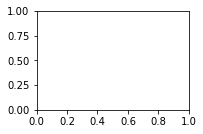

In [19]:

#Create a figure with 2x2x3 dubplot layout and make the top left subplot active
plt.subplot(2,2,3)

In [20]:
def sex_to_num(sex):
   if sex =='Male':
        return 0
   if sex == 'Female':
        return 1

In [21]:
clean_study_data_complete['Sex_num'] = clean_study_data_complete['Sex'].map(sex_to_num)

<ipython-input-21-21a05554e6cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_study_data_complete['Sex_num'] = clean_study_data_complete['Sex'].map(sex_to_num)


In [22]:
tumor_sex = clean_study_data_complete[clean_study_data_complete['Tumor Volume (mm3)'].isin(tumor_vol_list_max)]
tumor_sex

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Sex_num
1776,q597,45,45.220869,2,Ramicane,Male,20,25,0
1778,o331,45,78.567014,4,Ketapril,Male,24,30,0
1781,c139,45,72.226731,2,Infubinol,Male,11,28,0
1793,e227,45,73.212939,3,Placebo,Male,1,30,0
1830,m269,45,75.123690,1,Stelasyn,Female,22,28,1
1840,f545,45,73.324432,1,Zoniferol,Female,20,26,1
1858,k210,45,68.923185,3,Ceftamin,Male,15,28,0
1861,l725,45,76.668817,3,Naftisol,Female,8,26,1
1878,i557,45,47.685963,1,Capomulin,Female,1,24,1
1884,o562,45,72.455421,2,Propriva,Female,4,25,1


Text(0.5, 0, 'Final Tumor Volume (mm3)')

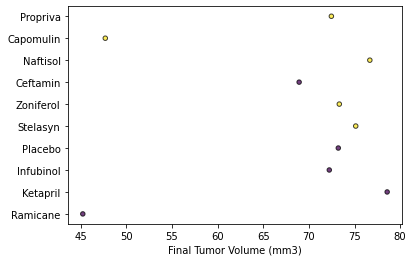

In [23]:
plt.scatter(tumor_sex['Tumor Volume (mm3)'], tumor_sex['Drug Regimen'],
            marker="o", 
            facecolors="red",
            edgecolors="black",
            alpha=0.75,
            s = 20,
            c = tumor_sex['Sex_num'])

plt.xlabel('Final Tumor Volume (mm3)')

<AxesSubplot:>

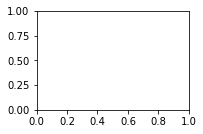

In [24]:
plt.subplot(2,2,4)

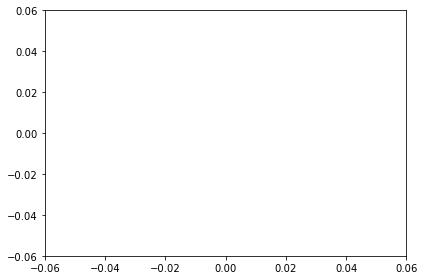

In [27]:
plt.margins(x = 0.1, y= 0.1)
plt.tight_layout()